# Day - 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 1: Explore Basic Info

In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

### Step 2: Handle Missing Values

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

### Step 3: Encode Categorical Features

In [5]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.drop(columns=['Name', 'Ticket'], inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,False,True
887,888,1,1,0,19.0,0,0,30.0000,False,True
888,889,0,3,0,28.0,1,2,23.4500,False,True
889,890,1,1,1,26.0,0,0,30.0000,False,False


### Step 4: Normalize Numerical Features

In [6]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

### Step 5: Visualize outliers using boxplots 

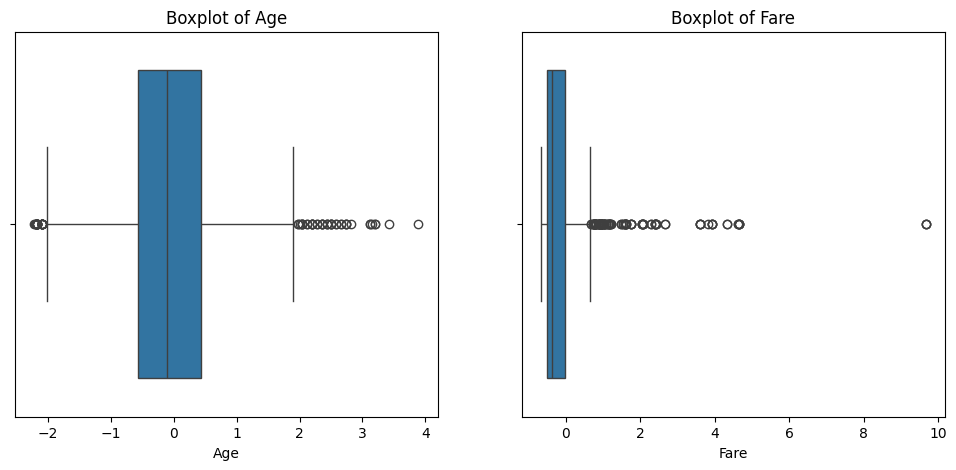

Final dataset shape: (718, 10)
   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    1 -0.565736      1      0 -0.502445   
2            3         1       3    0 -0.258337      0      0 -0.488854   
3            4         1       1    0  0.433312      1      0  0.420730   
4            5         0       3    1  0.433312      0      0 -0.486337   
5            6         0       3    1 -0.104637      0      0 -0.478116   

   Embarked_Q  Embarked_S  
0       False        True  
2       False        True  
3       False        True  
4       False        True  
5        True       False  


In [7]:
# Visualize outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()


# Remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]

df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

# Final Dataset
print(f"Final dataset shape: {df.shape}")
print(df.head())
